# How accurately can topic modelling be  applied on Twitter data?

How accurately topic modeling can be applied to conversational data? To answer this question LDA has been applied  to 10 sub-sets of the Twitter data-set. To evaluate a LDA model, the model perplexity and model coherence are  common used evaluation method.

Libaries are imported

In [2]:
import pandas as pd 
import re
import gensim
import numpy as np
from gensim.models import Word2Vec
from gensim import corpora, models
from gensim.models import CoherenceModel

Loading dataset

In [3]:
df = pd.read_csv("/home/sije/Thesis/data/twitter_dataset.csv", delimiter = ';')
df = df.dropna()
print('Length of dataset = ' + str(len(df)))

Length of dataset = 464845


Dataset is split in 10 subsets

In [4]:
splitted_data = np.array_split(df, 10)

Function which returns perplexity score for a given LDA model.

In [5]:
def perplexity(dataframe):
    message = dataframe['message']
    messages = []
    count = 0
    for string in message:
        count += 1
        p = re.compile('@[a-zA-Z]+')
        findall = p.findall(str(string))
        string = re.sub(r'@[a-zA-Z]+', '', str(string))
        string = re.sub(r'[^a-zA-Z ]', '', str(string))
        messages.append(str(string).lower().split())

    
    selected_messages = messages

    dictionary = gensim.corpora.Dictionary(selected_messages)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in selected_messages]
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
    Perplexity = lda_model.log_perplexity(bow_corpus)
    return(Perplexity)

Perplexity is caculated for each subset

In [7]:
values_perplexity = []
for dataframe in splitted_data:
    values_perplexity.append(perplexity(dataframe))
keys_perplexity = []
for x in range(1,11):
    keys_perplexity.append(x)

Variance and standard deviation is calculated between perplexity scores. 

In [8]:
np_values_perplexity = np.array(values_perplexity)
print('Standard deviation = ' + str(np.std(np_values_perplexity)))
print('Variance = ' + str(np.var(np_values_perplexity)))

Standard deviation = 0.3197858339185289
Variance = 0.10226297957496895


Perplexity scores are ploted in a barplot

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-6.933653503290247, -6.98736721647814, -6.210857128939283, -6.298428307435893, -7.079119543192184, -6.899521588412551, -7.091581182666609, -7.094033005546986, -7.1226442263270915, -7.061134883204106]


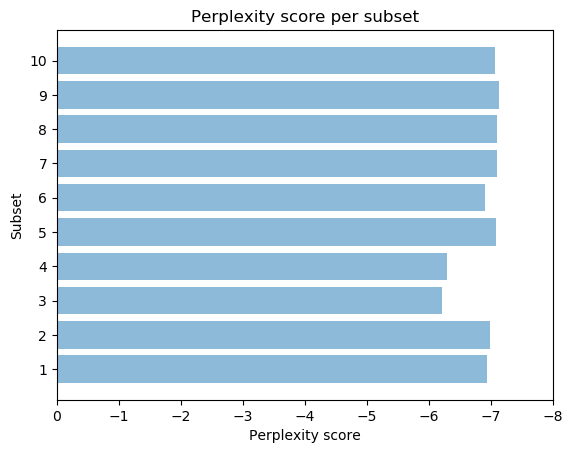

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(keys_perplexity))

print(keys_perplexity)
print(values_perplexity)


plt.barh(y_pos, values_perplexity, align='center', alpha=0.5)
plt.yticks(y_pos, keys_perplexity)
plt.xlabel('Perplexity score')
plt.ylabel('Subset')
plt.xlim(0, -8)
plt.title('Perplexity score per subset')

plt.show()

Function which returns the coherence score for a given LDA model

For each subset the perplexity score is shown in the figure above. Between the perplexity scores is a variance of  8.25 and standard deviation of 2.87.The performance per data set is slightly different, but stable.

In [11]:
def coherence(dataframe):
    message = dataframe['message']
    messages = []
    count = 0
    for string in message:
        count += 1
        p = re.compile('@[a-zA-Z]+')
        findall = p.findall(str(string))
        string = re.sub(r'@[a-zA-Z]+', '', str(string))
        string = re.sub(r'[^a-zA-Z ]', '', str(string))
        messages.append(str(string).lower().split())

    
    selected_messages = messages

    dictionary = gensim.corpora.Dictionary(selected_messages)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in selected_messages]
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
    id2word = corpora.Dictionary(selected_messages)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=selected_messages, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    Coherence_Score = coherence_lda
    return(Coherence_Score)

Coherence is caculated for each subset

In [12]:
values_coherence = []
for dataframe in splitted_data:
    values_coherence.append(coherence(dataframe))
keys_coherence = []
for x in range(1,11):
    keys_coherence.append(x)

Variance and standard deviation is calculated between the coherence scores.

In [13]:
np_values_coherence = np.array(values_coherence)
print('Standard deviation = ' + str(np.std(np_values_coherence)))
print('Variance = ' + str(np.var(np_values_coherence)))

Standard deviation = 0.03660150763971259
Variance = 0.001339670361499939


Coherence scores are ploted in a barplot

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.6163747923497707, 0.6535654063385687, 0.5727892559959649, 0.6181809507519854, 0.6550081320180514, 0.6094090507074531, 0.5966312396972695, 0.5755511820384267, 0.5621389378748719, 0.5364952434327688]


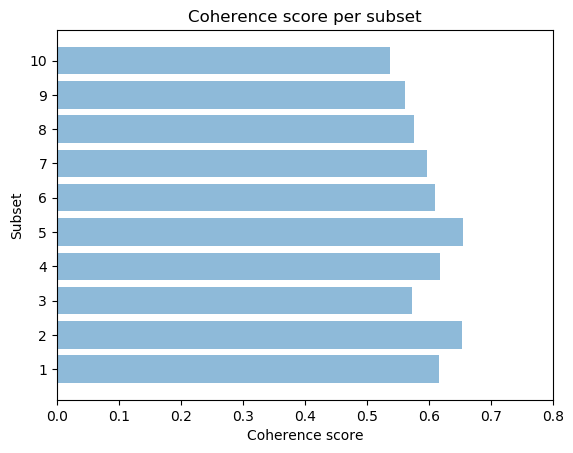

In [14]:
y_pos = np.arange(len(keys_perplexity))

print(keys_coherence)
print(values_coherence)


plt.barh(y_pos, values_coherence, align='center', alpha=0.5)
plt.yticks(y_pos, keys_coherence)
plt.xlabel('Coherence score')
plt.ylabel('Subset')
plt.xlim(0, 0.8)
plt.title('Coherence score per subset')

plt.show()

For each subset the coherence score is shown in figure 2. Between the coherence scores is a variance of 0.0014 and standard deviation of 0.038. Also the coherence score per data set is slightly different, but stable. Both evaluation methods shows slightly different results between sub-sets, but overall performs stable. By using a LDA model with 10 output topics,can a perplexity score achieved between -6.21 and -7.09 and a coherence score between 0.54 and 0.65.